# Explaining a nlp model's layer rankings


## See the [ecco toolkit](https://ecco.readthedocs.io/en/main/){cite}`alammar-2021-ecco`


In [49]:
import warnings
warnings.filterwarnings('ignore')

from explainer.explainers import layer_rankings

In [50]:
model = 'distilgpt2'

import entry_point
explainer = entry_point.entry_point(model)


## Show model layers

In [51]:

explainer.lm.model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

## Show rankings for the next word

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

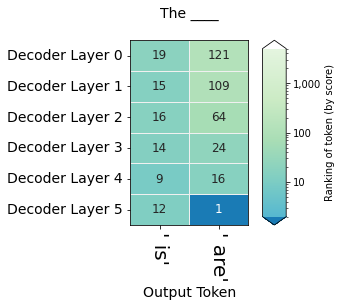

In [52]:
text = "The keys to the cabinet"
explainer(text, generate=1, do_sample=False).rankings_watch(watch=[318, 389], position=5)

## Calculate Integrated Gradients and Input X Gradient saliency attributions

In [53]:
text= "The countries of the European Union are:\n1. Austria\n2. Belgium\n3. Bulgaria\n4."
output = explainer.lm.generate(text, generate=20, do_sample=True, attribution=['ig', 'grad_x_input'])

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

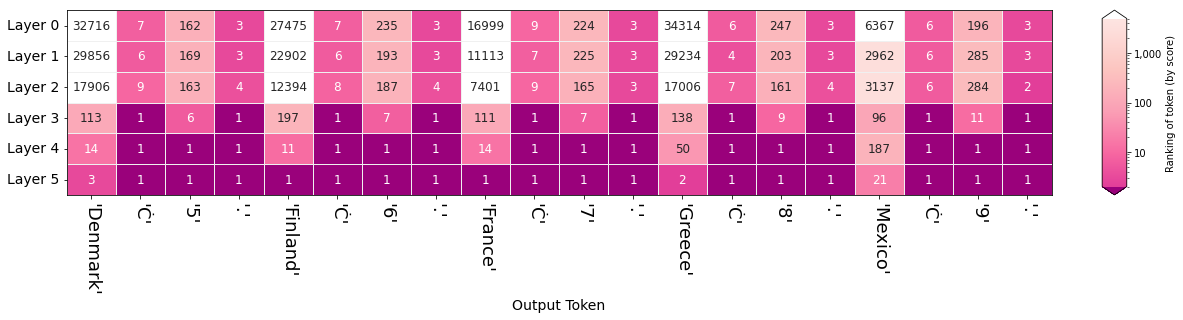

In [54]:
output.rankings()
output.primary_attributions(attr_method='ig', style="detailed")

In [55]:
output.primary_attributions(attr_method='grad_x_input')

<IPython.core.display.Javascript object>

In [56]:
output.primary_attributions(attr_method='grad_x_input', style="detailed")

<IPython.core.display.Javascript object>